In [19]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# ------------------------------
# 1. Load Dataset
# ------------------------------
df = pd.read_csv("/content/Netflix Dataset.csv")

# Display first few records
print("First 5 rows of the dataset:\n", df.head(), "\n")


First 5 rows of the dataset:
   Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2  December 20, 2018      R     78 min   
3  November 16, 2017  PG-13     80 min   
4    January 1, 2020  PG-13    123 min   

 

In [21]:
# ------------------------------
# 2. Data Cleaning
# ------------------------------
print("Initial shape:", df.shape)

# Drop duplicates if any
df.drop_duplicates(inplace=True)
print("After removing duplicates:", df.shape)

# Check missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Fill NaN values appropriately
df['Director'].fillna('Unknown', inplace=True)
df['Cast'].fillna('Not Available', inplace=True)
df['Country'].fillna('Unknown', inplace=True)
df['Release_Date'].fillna(method='ffill', inplace=True) # Corrected column name
df['Rating'].fillna(df['Rating'].mode()[0], inplace=True)

Initial shape: (7789, 11)
After removing duplicates: (7787, 11)

Missing values per column:
 Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


/tmp/ipython-input-2537737736.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Director'].fillna('Unknown', inplace=True)
/tmp/ipython-input-2537737736.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [22]:
# ------------------------------
# 3. Data Preprocessing
# ------------------------------
# Convert Release_Date to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Extract year from Release_Date
df['year_added'] = df['Release_Date'].dt.year

# Standardize text data
df['Category'] = df['Category'].str.strip()
df['Type'] = df['Type'].str.strip()
df['listed_in'] = df['Type'].str.lower()

/tmp/ipython-input-803568148.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=df, palette='viridis')


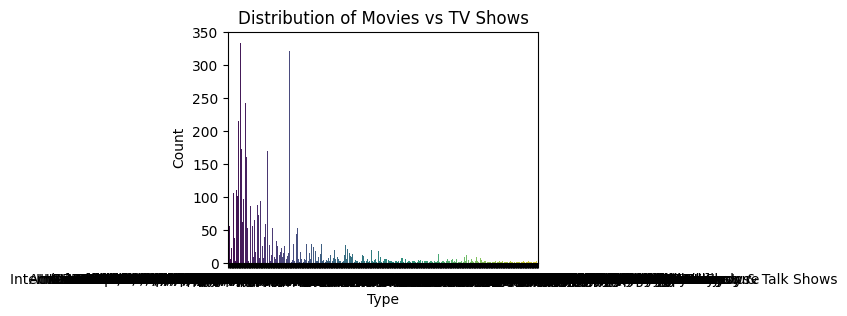

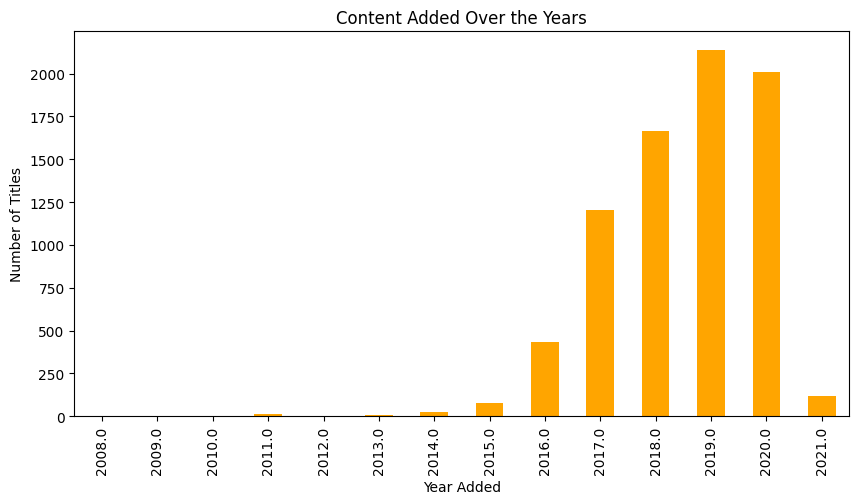

/tmp/ipython-input-803568148.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='coolwarm')


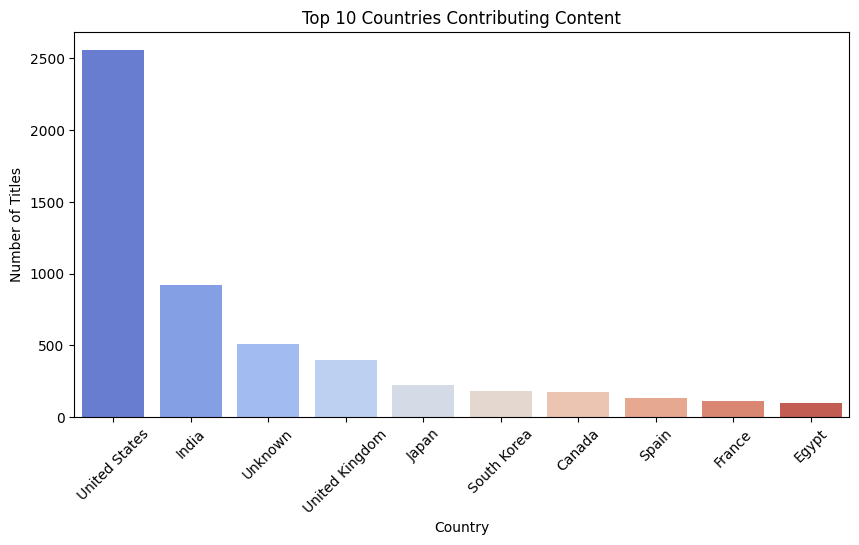

/tmp/ipython-input-803568148.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_genres.keys()), y=list(top_genres.values()), palette='magma')


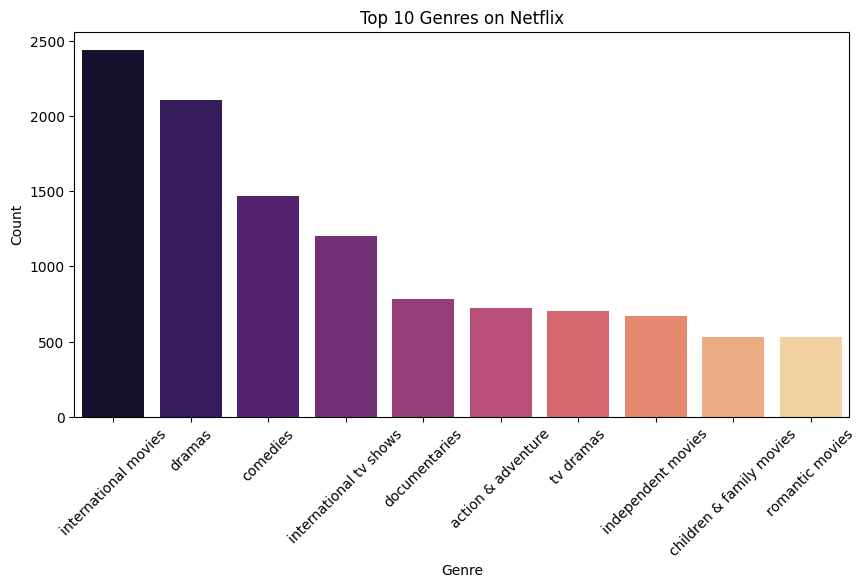

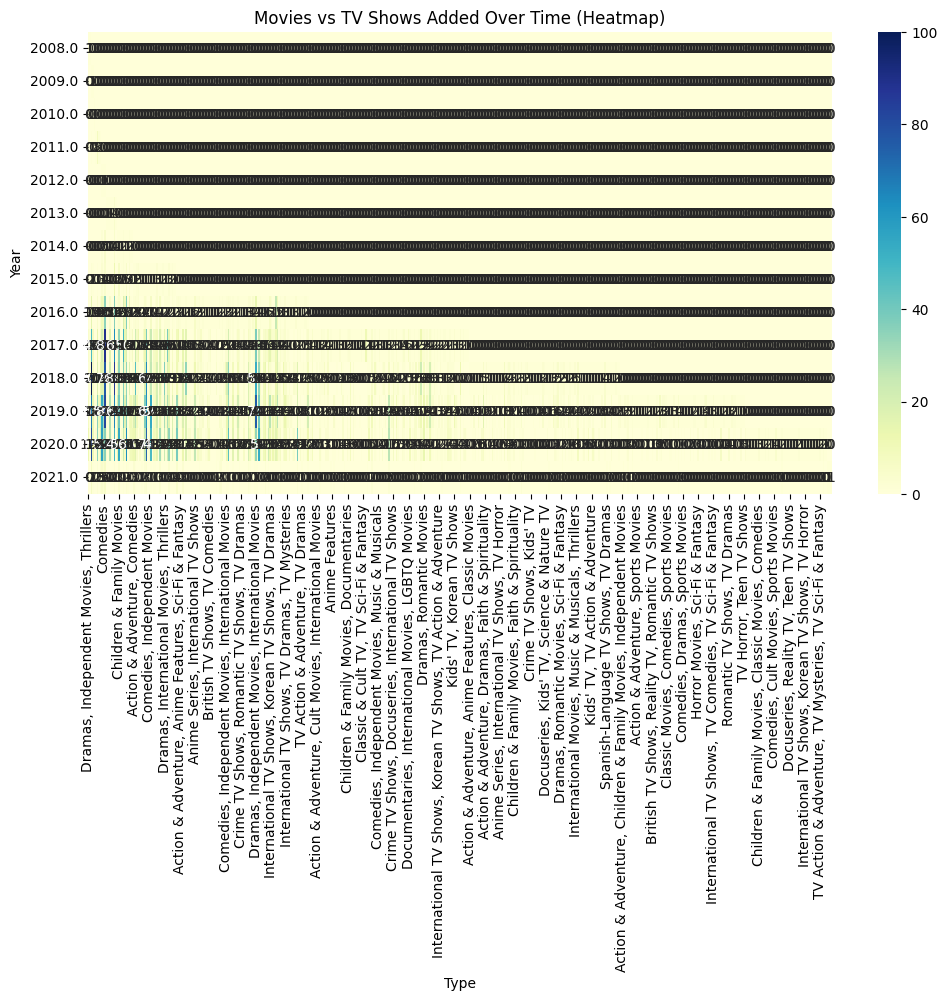

In [23]:
# ------------------------------
# 4. Exploratory Data Analysis
# ------------------------------

# ----- Distribution of Type -----
plt.figure(figsize=(4,3)) # Reduced figure size
sns.countplot(x='Type', data=df, palette='viridis')
plt.title('Distribution of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# ----- Content added per year -----
plt.figure(figsize=(10,5))
df['year_added'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Content Added Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.show()

# ----- Top 10 Countries with most content -----
top_countries = df['Country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='coolwarm')
plt.title('Top 10 Countries Contributing Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

# ----- Top 10 Genres -----
from collections import Counter
genres = df['listed_in'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])
genre_count = Counter([genre for sublist in genres for genre in sublist])
top_genres = dict(sorted(genre_count.items(), key=lambda x: x[1], reverse=True)[:10])

plt.figure(figsize=(10,5))
sns.barplot(x=list(top_genres.keys()), y=list(top_genres.values()), palette='magma')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# ----- Movies vs TV Shows over time -----
# Prepare data for heatmap
content_over_time = df.groupby(['year_added', 'Type']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(content_over_time, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Movies vs TV Shows Added Over Time (Heatmap)')
plt.xlabel('Type')
plt.ylabel('Year')
plt.show()
# Format y-axis labels with comma separators
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.show()

In [24]:
# ------------------------------
# 5. Insights
# ------------------------------
print("\n===== Insights =====")
print(f"Total Titles: {len(df)}")
print(f"Movies: {len(df[df['Type']=='Movie'])}, TV Shows: {len(df[df['Type']=='TV Show'])}")
print("Most common genres:", list(top_genres.keys())[:5])
print("Top contributing countries:", list(top_countries.index)[:5])


===== Insights =====
Total Titles: 7787
Movies: 0, TV Shows: 0
Most common genres: ['international movies', 'dramas', 'comedies', 'international tv shows', 'documentaries']
Top contributing countries: ['United States', 'India', 'Unknown', 'United Kingdom', 'Japan']


In [25]:
# ------------------------------
# 6. Save Cleaned Data
# ------------------------------
df.to_csv("Cleaned_Netflix_Dataset.csv", index=False)
print("\nCleaned dataset saved as 'Cleaned_Netflix_Dataset.csv'.")


Cleaned dataset saved as 'Cleaned_Netflix_Dataset.csv'.
